# ENM 531 HW2 Solution

## Q1
$\log(p(\mu)) = - \sum_{i=1}^{n}\frac{(x_i-\mu)^2}{2\sigma^2} - \frac{\mu^2}{2\gamma^2}$.

And
 
$\frac{d\log(p(\mu))}{d\mu} = \sum_{i=1}^{n} \frac{\mu-x_i}{\sigma^2}+\frac{\mu}{\gamma^2}$

So the optimal value of $\mu$ is $\frac{\gamma^2 \sum_{i=1}^{n}x_i}{\sigma^2+n\gamma^2}$

## Q2

$p(x,y,\alpha,\beta,\gamma) \propto\gamma^{n/2 + 1}\exp\left[-\frac{\gamma}{2}||y-\alpha x - \beta\vec 1||_2^2\right]\exp\left[-\frac{1}{2}(\alpha^2+\beta^2)\right]\exp[-\gamma].$

Hence

$p(\alpha|x,y,\beta,\gamma) \propto \exp\left[-\frac{\gamma}{2}(x^T x\alpha^2 + 2(\beta\vec 1-y)^Tx\alpha) - \frac{\alpha^2}{2}\right] \propto \exp\left[-\frac{(1+\gamma x^T x)}{2}\left(\alpha + \frac{\gamma}{(1+\gamma x^T x)}(\beta\vec 1-y)^Tx\right)^2\right] \sim \mathcal{N}\left(\frac{\gamma}{(1+\gamma x^T x)}(y-\beta\vec 1)^Tx, \frac{1}{(1+\gamma x^T x)}\right),$


$p(\beta|x,y,\alpha,\gamma) \propto \exp\left[-\frac{\gamma}{2\pi}\left(n\beta^2+ 2(\alpha x-y)^T\vec 1\beta\right) - \frac{\beta^2}{2}\right] \propto \exp\left[-\frac{(1+n\gamma)}{2}\left(\beta + \frac{\gamma(\alpha x - y)^T\vec 1}{1+n\gamma}\right)^2\right] \sim\mathcal{N}\left(\gamma\frac{(y-\alpha x)^T\vec 1}{1+n\gamma}, \frac{1}{1+n\gamma}\right),$

and

$p(\gamma|x,y,\alpha,\beta) \propto \gamma^{n/2 + 1}\exp\left[-\frac{\gamma}{2}||y-\alpha x - \beta\vec 1||_2^2-\gamma\right] \sim Gamma\left(\frac{n}{2} + 2,\frac{1}{2}||y-\alpha x - \beta\vec 1||_2^2 + 1\right).$



## Q3

\begin{align}
	\mathbb E -\nabla^2 \log p(x|\theta) &= -\int p(x|\theta)\nabla^2 \log p(x|\theta) dx\\
	&=\int p(x|\theta)\frac{p(x|\theta)\nabla p(x|\theta)\nabla p(x|\theta)^T - \nabla^2 p(x|\theta)}{p(x|\theta)^2} dx\\
	&=\int p(x|\theta)\frac{p(x|\theta)\nabla p(x|\theta)\nabla p(x|\theta)^T}{p(x|\theta)^2} dx - \int p(x|\theta)\frac{\nabla^2 p(x|\theta)}{p(x|\theta)^2} dx\\
	&=\int p(x|\theta)\frac{p(x|\theta)\nabla p(x|\theta)\nabla p(x|\theta)^T}{p(x|\theta)^2} dx - \nabla^2 \int p(x|\theta)dx\\
	&=\int p(x|\theta)\nabla \log p(x|\theta)\nabla \log p(x|\theta)^Tdx\\
	&=\mathbb E_x \nabla \log p(x|\theta)\nabla \log p(x|\theta)^T.
\end{align}

The KL divergence $D_{KL} = \int p(x|\theta)\log\frac{p(x|\theta)}{p(x|\theta')}dx$. And its Hessian

\begin{align}
	\nabla^2 D_{KL}(p(x|\theta), p(x|\theta')) &=\nabla^2 \int p(x|\theta)(\log p(x|\theta) -\log p(x|\theta'))dx\\
	&= \int p(x|\theta)\frac{p(x|\theta')\nabla p(x|\theta')\nabla p(x|\theta')^T - \nabla^2 p(x|\theta')}{p(x|\theta)^2} dx\\
	&=\int p(x|\theta)\frac{p(x|\theta')\nabla p(x|\theta')\nabla p(x|\theta')^T}{p(x|\theta)^2} dx - \int p(x|\theta)\frac{\nabla^2 p(x|\theta')}{p(x|\theta)^2} dx\\
	&=\int p(x|\theta)\frac{p(x|\theta')\nabla p(x|\theta')\nabla p(x|\theta')^T}{p(x|\theta)^2} dx - \nabla^2 \int p(x|\theta')dx\\
	&=\int p(x|\theta)\nabla \log p(x|\theta')\nabla \log p(x|\theta')^Tdx\\
	&=\mathbb E_x \nabla \log p(x|\theta')\nabla \log p(x|\theta')^T,
\end{align}

where the last term vanish since $\int p(x|\theta') dx = 1$ is a constant.

When $\theta' = \theta$

$\nabla^2 D_{KL}(p(x|\theta), p(x|\theta')) = E_x \nabla \log p(x|\theta)\nabla \log p(x|\theta)^T.$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

Text(0.5, 1.0, 'Likelihood during iteration, eta = 0.002')

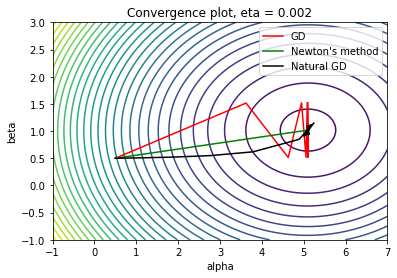

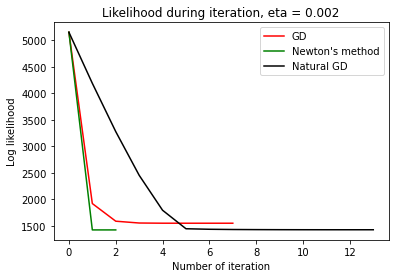

In [2]:
def loglkl(x,y,k):
    a = k[0]
    b = k[1]
    dev = a*x + b - y
    y = float(len(x)/2*np.log(2*np.pi) + 0.5*dev.T@dev)
    return y
def gridloglkl(x,y,WX,WY):
    
    l = np.zeros([len(WY), len(WX)])
    for i, w1 in enumerate(WX):
        for j, w2 in enumerate(WY):
            g = np.array([[w1],[w2]])
            l[j,i] = loglkl(x,y,g)
    return l
    
    
def gradient(x,y,k):
    a = k[0,0]
    b = k[1,0]
    n = len(x)
    beta = b + np.zeros([n,1])
    g = np.zeros([2,1])
    g[0] = a*x.T@x + beta.T@x - x.T@y
    g[1] = n*b + np.sum(a*x - y)
    return g
def hessian(x,y):
    return np.array([[x.T@x, np.sum(x)],[np.sum(x), len(x)]]).astype(np.float)

def fischerinfo(x,y,k):
    fischer = np.zeros([2,2])
    for i in range(0,len(x)):
        g = gradient(x[i],y[i],k)
        fischer = fischer + g@g.T
    return fischer/len(x)

def gdstep(x,y,tempw, eta = 0.002):
    return tempw - eta*gradient(x,y,tempw)

def ntstep(x,y,tempw,eta = 0.002):
    # Eta is not used but set for the convenience of ADT
    return tempw - np.linalg.inv(hessian(x,y))@gradient(x,y,tempw)

def ngdstep(x,y,tempw,eta = 0.002):
    return tempw - eta*np.linalg.pinv(fischerinfo(x,y,tempw))@gradient(x,y,tempw)

def itermethod(x,y,stepfunc,itmax = 100, init = np.array([[0.5],[0.5]]), eta = 0.002,tol = 0.001):
    
    i = 0
    delta = 1
    ngdw = init
    tempw = ngdw.copy()
    diff = 1
    ngdloss = np.array([loglkl(x,y,ngdw[:,-1].T)])
    # The iteration is terminated once it begins to oscillate.
    while delta > tol and i < itermax and diff > -tol:
        tempw = stepfunc(x,y,tempw,eta = 0.002)
        ngdw = np.hstack((ngdw,tempw))
        ngdloss = np.hstack((ngdloss, loglkl(x,y,tempw)))
        delta = np.abs(loglkl(x,y,ngdw[:,-2]) - loglkl(x,y,ngdw[:,-1]))
        diff = loglkl(x,y,ngdw[:,-2]) - loglkl(x,y,ngdw[:,-1])
        i = i + 1
    ngditernum = i
    # Returns stepwise loss, parameters and number of iteration
    return ngdloss,ngdw,ngditernum




    
x = random.uniform(-1,1,1000).reshape(-1,1)
y = 5*x + 1 + random.normal(0,1,[1000,1])
gdw = np.array([[0.5],[0.5]])
gdloss = np.array([loglkl(x,y,gdw[:,-1])])
tempw = gdw.copy()
itermax = 100

# Gradient descent
gdloss,gdw,gditernum = itermethod(x,y,gdstep,eta = 0.002)
# Newton method
ntloss,ntw,ntiternum = itermethod(x,y,ntstep,eta = 0.002)
# Natual gradient descent
ngdloss,ngdw,ngditernum = itermethod(x,y,ngdstep,eta = 0.002)

gridsz = 500
xmin = -1
xmax = 7
ymin = -1
ymax = 3

wx = np.linspace(xmin,xmax,gridsz)
wy = np.linspace(ymin,ymax,gridsz)
WX,WY = np.meshgrid(wx,wy)
Z = gridloglkl(x,y,wx,wy)
fig, ax = plt.subplots(1)
contour = ax.contour(WX,WY,Z,30)
ax.set_xlabel("alpha")
ax.set_ylabel("beta")
ax.set_title("Convergence plot, eta = 0.002")
ax.plot(gdw[0,:],gdw[1,:], c = 'r')
ax.plot(ntw[0,:],ntw[1,:], c = 'g')
ax.plot(ngdw[0,:],ngdw[1,:], c = 'k')
ax.legend(['GD','Newton\'s method','Natural GD'])

fig1, ax1 = plt.subplots(1)

ax1.set_xlabel('Number of iteration')
ax1.set_ylabel('Log likelihood')
ax1.plot(range(len(gdloss)), gdloss, c = 'r')
ax1.plot(range(len(ntloss)), ntloss, c = 'g')
ax1.plot(range(len(ngdloss)), ngdloss, c = 'k')
ax1.legend(['GD','Newton\'s method','Natural GD'])
ax1.set_title('Likelihood during iteration, eta = 0.002')

## Q4

Let $\Phi$ be the feature matrix,

$W_{MLE}=(\Phi^{T}\Phi)^{-1}\Phi^{T} y$,

and $W_{MAP}=(\Phi^{T}\Phi+\frac{\beta}{\alpha}I)^{-1}\Phi^{T}y$.

In [3]:
%reset

In [4]:
import jax.numpy as np   
from jax import random
from jax.scipy.stats import norm
from pyDOE import lhs
import matplotlib.pyplot as plt

In [5]:
# Create random input and output data
N=200
alpha = 5.0
beta = 0.1
key = random.PRNGKey(0)
X = lhs(1, N)
pi = 3.1415926
X = 2.0*X - np.ones(X.shape)

#print(X)
y1 = np.sin(pi*X) + np.sin(3.0*pi*X) + np.sin(4.0*pi*X)
#y1 = y1 + noise_var*random.normal(key, y.shape)
y1 = y1 + 0.1*np.std(y1)*random.normal(key,y1.shape)

y2 = 1.5*np.ones(X.shape) - 2.0*X - 3.0*X**2 + 3.0*X**3
y2 = y2 + 0.1*np.std(y2)*random.normal(key,y2.shape)

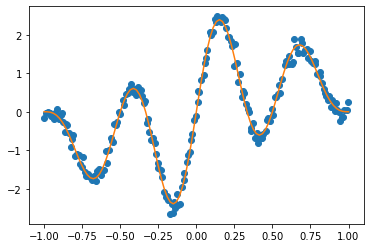

In [6]:
plt.figure()
plt.plot(X, y1 ,'o')

t1 = np.linspace(-1,1,100)
plt.plot(t1, np.sin(pi*t1) + np.sin(3.0*pi*t1) + np.sin(4.0*pi*t1),'-')

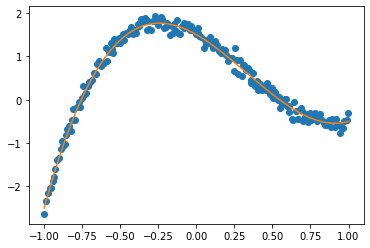

In [7]:
plt.figure()
plt.plot(X, y2 ,'o')

t1 = np.linspace(-1,1,100)
plt.plot(t1, 1.5*np.ones(t1.shape) - 2.0*t1 - 3.0*t1**2 + 3.0*t1**3,'-')

In [8]:
class BayesianLinearRegression:
  """
    Linear regression model: y = (w.T)*x + \epsilon
    w ~ N(0,beta^(-1)I)
    P(y|x,w) ~ N(y|(w.T)*x, alpha^(-1)I)
  """
  def __init__(self, X, y, alpha = 5.0, beta = 0.1):
      # Store training data
      self.X = X
      self.y = y
      # Store precisions
      self.alpha = alpha
      self.beta = beta
      # Small jitter for numerically stable matrix inversion
      self.jitter = 1e-8

  # Computes the MLE estimate of the regression weights
  def fit_MLE(self):
      xTx_inv = np.linalg.inv(np.matmul(self.X.T,self.X) + self.jitter*np.eye(self.X.shape[1]))
      xTy = np.matmul(self.X.T, self.y)
      w_MLE = np.matmul(xTx_inv, xTy)
      self.w_MLE = w_MLE
      return w_MLE

  # Computes the MAP estimate of the regression weights
  def fit_MAP(self):
      Lambda = np.matmul(self.X.T,self.X) + \
               (self.beta/self.alpha)*np.eye(self.X.shape[1])
      Lambda_inv = np.linalg.inv(Lambda)
      xTy = np.matmul(self.X.T, self.y)
      mu = np.matmul(Lambda_inv, xTy)
      self.w_MAP = mu
      self.Lambda_inv = Lambda_inv
      return mu, Lambda_inv

  # Computes the predictive posterior distribution
  def predictive_distribution(self, X_star):
      mean_star = np.matmul(X_star, self.w_MAP)
      var_star = np.eye(X_star.shape[0])/self.alpha + \
                 np.matmul(X_star, np.matmul(self.Lambda_inv, X_star.T))
      return mean_star, var_star

In [9]:
# Define model: use Identity basis
p1 = np.ones(X.shape)
p2 = X

p = np.concatenate([p1,p2], axis=1)
print(p.shape)
#for data set y1
model = BayesianLinearRegression(p, y1, alpha, beta)

#for data set y2
model2 = BayesianLinearRegression(p, y2, alpha, beta)

(200, 2)


In [10]:
# Fit MLE and MAP estimates for w
w_MLE = model.fit_MLE()
w_MAP, Lambda_inv = model.fit_MAP()

w2_MLE = model2.fit_MLE()
w2_MAP, Lambda2_inv = model2.fit_MAP()

In [11]:
# Predict at a set of test points using the trained models
X_star = np.linspace(-1,1,200)[:,None]
p1 = np.ones(X_star.shape)
p2 = X_star

p_star = np.concatenate([p1,p2], axis=1)
y_pred_MLE = np.matmul(p_star, w_MLE)
y_pred_MAP = np.matmul(p_star, w_MAP)

y2_pred_MLE = np.matmul(p_star, w2_MLE)
y2_pred_MAP = np.matmul(p_star, w2_MAP)

In [12]:
# Draw sampes from the predictive posterior
num_samples = 100
mean_star, var_star = model.predictive_distribution(p_star)
samples = random.multivariate_normal(key, mean_star.flatten(), var_star, (num_samples,))
percentiles = np.percentile(samples, [5.0, 95.0], axis=0)

mean2_star, var2_star = model2.predictive_distribution(p_star)
samples2 = random.multivariate_normal(key, mean2_star.flatten(), var2_star, (num_samples,))
percentiles2 = np.percentile(samples2, [5.0, 95.0], axis=0)

Text(0.5, 1.0, 'y2 : Identity basis')

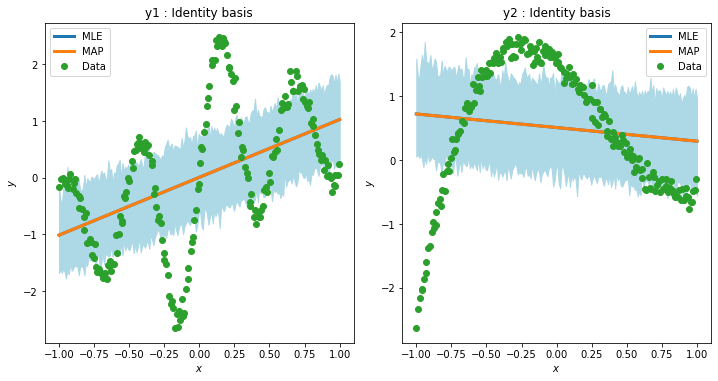

In [13]:
# Plot
plt.figure(1, figsize=(20,10))
plt.subplot(2,4,1)
plt.plot(X_star, y_pred_MLE, linewidth=3.0, label = 'MLE')
plt.plot(X_star, y_pred_MAP, linewidth=3.0, label = 'MAP')
plt.fill_between(X_star.flatten(), percentiles[0, :], percentiles[1, :], color='lightblue')
#for i in range(0, num_samples):
#    plt.plot(X_star, samples[i,:], 'k', linewidth=0.05)
plt.plot(X,y1,'o', label = 'Data')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tight_layout()
plt.title('y1 : Identity basis')

plt.subplot(2,4,2)
plt.plot(X_star, y2_pred_MLE, linewidth=3.0, label = 'MLE')
plt.plot(X_star, y2_pred_MAP, linewidth=3.0, label = 'MAP')
plt.fill_between(X_star.flatten(), percentiles2[0, :], percentiles2[1, :], color='lightblue')
#for i in range(0, num_samples):
#    plt.plot(X_star, samples2[i,:], 'k', linewidth=0.05)
plt.plot(X,y2,'o', label = 'Data')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tight_layout()
plt.title('y2 : Identity basis')

In [14]:
# Define model: use Fourier basis
p1 = np.ones(X.shape)
p2 = np.sin(pi*X)
p3 = np.cos(pi*X)
p4 = np.sin(2.0*pi*X)
p5 = np.cos(2.0*pi*X)
p6 = np.sin(3.0*pi*X)
p7 = np.cos(3.0*pi*X)
p8 = np.sin(4.0*pi*X)
p9 = np.cos(4.0*pi*X)
p = np.concatenate([p1,p2,p3,p4,p5,p6,p7,p8,p9], axis=1)
print(p.shape)
#for data set y1
model = BayesianLinearRegression(p, y1, alpha, beta)

#for data set y2
model2 = BayesianLinearRegression(p, y2, alpha, beta)

(200, 9)


In [15]:
# Fit MLE and MAP estimates for w
w_MLE = model.fit_MLE()
w_MAP, Lambda_inv = model.fit_MAP()

w2_MLE = model2.fit_MLE()
w2_MAP, Lambda2_inv = model2.fit_MAP()


In [16]:
# Predict at a set of test points using the trained models
X_star = np.linspace(-1,1,200)[:,None]
p1 = np.ones(X_star.shape)
p2 = np.sin(pi*X_star)
p3 = np.cos(pi*X_star)
p4 = np.sin(2.0*pi*X_star)
p5 = np.cos(2.0*pi*X_star)
p6 = np.sin(3.0*pi*X_star)
p7 = np.cos(3.0*pi*X_star)
p8 = np.sin(4.0*pi*X_star)
p9 = np.cos(4.0*pi*X_star)
p_star = np.concatenate([p1,p2,p3,p4,p5,p6,p7,p8,p9], axis=1)
y_pred_MLE = np.matmul(p_star, w_MLE)
y_pred_MAP = np.matmul(p_star, w_MAP)

y2_pred_MLE = np.matmul(p_star, w2_MLE)
y2_pred_MAP = np.matmul(p_star, w2_MAP)

In [17]:
# Draw sampes from the predictive posterior
num_samples = 100
mean_star, var_star = model.predictive_distribution(p_star)
samples = random.multivariate_normal(key, mean_star.flatten(), var_star, (num_samples,))
percentiles = np.percentile(samples, [5.0, 95.0], axis=0)

mean2_star, var2_star = model2.predictive_distribution(p_star)
samples2 = random.multivariate_normal(key, mean2_star.flatten(), var2_star, (num_samples,))
percentiles2 = np.percentile(samples2, [5.0, 95.0], axis=0)

Text(0.5, 1.0, 'y2 : Fourier basis')

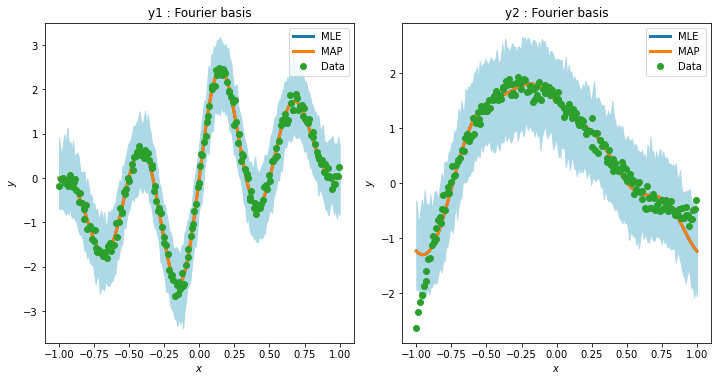

In [18]:
# Plot
plt.figure(1, figsize=(20,10))
plt.subplot(2,4,1)
plt.plot(X_star, y_pred_MLE, linewidth=3.0, label = 'MLE')
plt.plot(X_star, y_pred_MAP, linewidth=3.0, label = 'MAP')
plt.fill_between(X_star.flatten(), percentiles[0, :], percentiles[1, :], color='lightblue')
#for i in range(0, num_samples):
#     plt.plot(X_star, samples[i,:], 'k', linewidth=0.05)
plt.plot(X,y1,'o', label = 'Data')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tight_layout()
plt.title('y1 : Fourier basis')

plt.subplot(2,4,2)
plt.plot(X_star, y2_pred_MLE, linewidth=3.0, label = 'MLE')
plt.plot(X_star, y2_pred_MAP, linewidth=3.0, label = 'MAP')
plt.fill_between(X_star.flatten(), percentiles2[0, :], percentiles2[1, :], color='lightblue')
#for i in range(0, num_samples):
#    plt.plot(X_star, samples2[i,:], 'k', linewidth=0.05)
plt.plot(X,y2,'o', label = 'Data')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tight_layout()
plt.title('y2 : Fourier basis')

(200, 5)


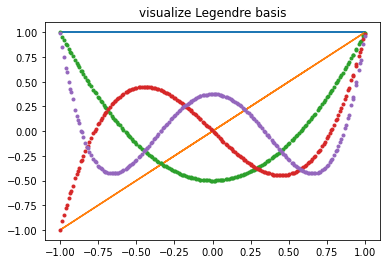

In [19]:
# Define model: use Legendre basis
p1 = np.ones(X.shape)
p2 = X
p3 = 0.5*( 3.0*(X**2) - np.ones(X.shape) )
p4 = 0.5*( 5.0*(X**3) - 3.0*X)
p5 = 0.125*( 35.0*(X**4) - 30.0*(X**2) + 3.0*np.ones(X.shape) )

plt.figure()
plt.plot(X,p1)
plt.plot(X,p2)
plt.plot(X,p3,'.')
plt.plot(X,p4,'.')
plt.plot(X,p5,'.')
plt.title('visualize Legendre basis')

p = np.concatenate([p1,p2,p3,p4,p5], axis=1)
print(p.shape)
#for data set y1
model = BayesianLinearRegression(p, y1, alpha, beta)

#for data set y2
model2 = BayesianLinearRegression(p, y2, alpha, beta)

In [20]:
# Fit MLE and MAP estimates for w
w_MLE = model.fit_MLE()
w_MAP, Lambda_inv = model.fit_MAP()

w2_MLE = model2.fit_MLE()
w2_MAP, Lambda2_inv = model2.fit_MAP()

In [21]:
# Predict at a set of test points using the trained models
X_star = np.linspace(-1,1,200)[:,None]
p1 = np.ones(X_star.shape)
p2 = X_star
p3 = 0.5*( 3.0*(X_star**2) - np.ones(X_star.shape) )
p4 = 0.5*( 5.0*(X_star**3) - 3.0*X_star)
p5 = 0.125*( 35.0*(X_star**4) - 30.0*(X_star**2) + 3.0*np.ones(X_star.shape) )

p_star = np.concatenate([p1,p2,p3,p4,p5], axis=1)
y_pred_MLE = np.matmul(p_star, w_MLE)
y_pred_MAP = np.matmul(p_star, w_MAP)

y2_pred_MLE = np.matmul(p_star, w2_MLE)
y2_pred_MAP = np.matmul(p_star, w2_MAP)

In [22]:
# Draw sampes from the predictive posterior
num_samples = 100
mean_star, var_star = model.predictive_distribution(p_star)
samples = random.multivariate_normal(key, mean_star.flatten(), var_star, (num_samples,))
percentiles = np.percentile(samples, [5.0, 95.0], axis=0)

mean2_star, var2_star = model2.predictive_distribution(p_star)
samples2 = random.multivariate_normal(key, mean2_star.flatten(), var2_star, (num_samples,))
percentiles2 = np.percentile(samples2, [5.0, 95.0], axis=0)

Text(0.5, 1.0, 'y2 : Legendre basis')

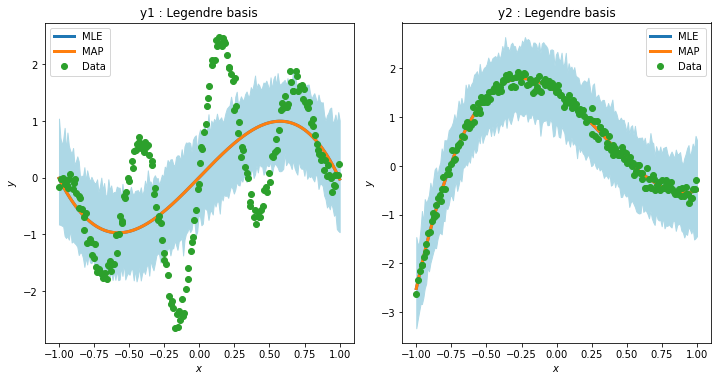

In [23]:
# Plot
plt.figure(1, figsize=(20,10))
plt.subplot(2,4,1)
plt.plot(X_star, y_pred_MLE, linewidth=3.0, label = 'MLE')
plt.plot(X_star, y_pred_MAP, linewidth=3.0, label = 'MAP')
plt.fill_between(X_star.flatten(), percentiles[0, :], percentiles[1, :], color='lightblue')
#for i in range(0, num_samples):
#     plt.plot(X_star, samples[i,:], 'k', linewidth=0.05)
plt.plot(X,y1,'o', label = 'Data')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tight_layout()
plt.title('y1 : Legendre basis')

plt.subplot(2,4,2)
plt.plot(X_star, y2_pred_MLE, linewidth=3.0, label = 'MLE')
plt.plot(X_star, y2_pred_MAP, linewidth=3.0, label = 'MAP')
plt.fill_between(X_star.flatten(), percentiles2[0, :], percentiles2[1, :], color='lightblue')
#for i in range(0, num_samples):
#     plt.plot(X_star, samples2[i,:], 'k', linewidth=0.05)
plt.plot(X,y2,'o', label = 'Data')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tight_layout()
plt.title('y2 : Legendre basis')

# Q5

In [24]:
import jax.numpy as np
from jax import random, jit, grad, vmap
from jax.experimental import optimizers
import jax.scipy.stats.norm as norm
from jax.nn import sigmoid, log_sigmoid, one_hot

import itertools
import numpy.random as npr
from tqdm import trange
from functools import partial
import matplotlib.pyplot as plt

In [25]:
from six.moves import urllib    
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)
import torchvision as thv
train = thv.datasets.MNIST('./', download=True, train=True)
val = thv.datasets.MNIST('./', download=True, train=False)

train_X_data = train.data.numpy()
train_Y_data = train.targets.numpy()

In [26]:
x_train = np.vstack((train_X_data[np.where(train_Y_data == 0)][:800].reshape(-1, 784), train_X_data[np.where(train_Y_data == 1)][:800].reshape(-1, 784)))
y_train = np.concatenate((train_Y_data[np.where(train_Y_data == 0)][:800], train_Y_data[np.where(train_Y_data == 1)][:800]))

x_validation = np.vstack((train_X_data[np.where(train_Y_data == 0)][800:1000].reshape(-1, 784), train_X_data[np.where(train_Y_data == 1)][800:1000].reshape(-1, 784)))
y_validation = np.concatenate((train_Y_data[np.where(train_Y_data == 0)][800:1000], train_Y_data[np.where(train_Y_data == 1)][800:1000]))

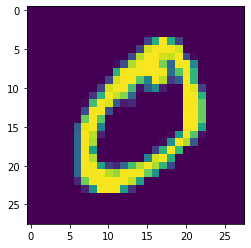

In [27]:
plt.imshow(x_train[0].reshape(28, 28))

In [28]:
# Normalize inputs, notice mean and std are vectors
#self.Xmean, self.Xstd = np.tile(X.mean(0),(X.shape[0],1)), np.tile(X.std(0),(X.shape[0],1))
jitter = 1e-8
Xmean, Xstd = np.tile(x_train.mean(0),(x_train.shape[0],1)), np.tile(x_train.std(0),(x_train.shape[0],1))
X = (x_train - Xmean)/(Xstd + jitter*np.ones(Xstd.shape))
#X = x_train
y = y_train
y = np.asarray(y).reshape(-1)
# Initiatlize parameters of the mean-field variational family
num_params = X.shape[1]
w = np.zeros(num_params)  
params = w
# Logger to monitor the loss function
loss_log = []
itercount = itertools.count()

# Define a function to calculate the log likelihood
def loss(params, X, y):
    w = params
    # Compute log_likelihood
    logit_prob = np.matmul(X, w)
    prob_pres = log_sigmoid(logit_prob)
    prob_abs = log_sigmoid(-logit_prob)
    # notice if y is a n by 1 matrix, this will not be a element-wise multiplication 
    log_likelihood = np.mean(y * prob_pres + (np.ones(y.shape) - y) * prob_abs)
    return -log_likelihood

Text(0, 0.5, 'loss')

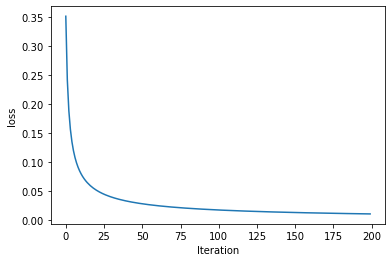

In [29]:
grad_loss = grad(loss)

n = X.shape[0]
lr = 0.02

for i in range(200):
    g = grad(loss)(params, X, y)
    params = params - lr*g
    #self.params = tree_multimap(lambda x, g: x - lr*g, self.params, g)
    loss_value = loss(params, X, y)
    loss_log.append(loss_value)
    #pbar.set_postfix({'Loss': loss_value})
plt.figure()
plt.plot(loss_log)
plt.xlabel('Iteration')
plt.ylabel('loss')

# Here the loss function is defined using mean instead of sum, so the loss is relatively small

In [30]:
# Normalize testing data inputs 
jitter = 1e-8
Xmean, Xstd = np.tile(x_validation.mean(0),(x_validation.shape[0],1)), np.tile(x_validation.std(0),(x_validation.shape[0],1))
X = (x_validation - Xmean)/(Xstd + jitter*np.ones(Xstd.shape))
#X = x_train
y = y_validation
y = np.asarray(y).reshape(-1)

In [31]:
X.shape

(400, 784)

In [32]:
logit_prob = np.matmul(X, params)
prob_pres = log_sigmoid(logit_prob)
prob_abs = log_sigmoid(-logit_prob)
log_like = y * prob_pres + (np.ones(y.shape) - y) * prob_abs
probability = np.exp(prob_pres)

# Build label outputs from the predicted probability: probability > 0.5 is digit 1, probability < 0.5 is digit 0
prob_mat = np.vstack((probability, 0.5*np.ones(probability.shape)))
y_predict = np.argmin(prob_mat, axis=0)

y_true = np.asarray(y_validation).reshape(-1)

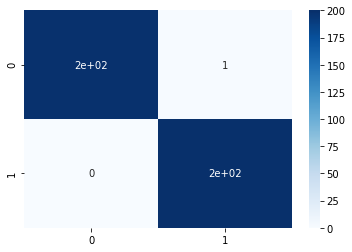

In [33]:
#build confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_mat = confusion_matrix(y_true, y_predict)
sns.heatmap(cf_mat, annot=True,cmap='Blues')

accuracy is  0.9975


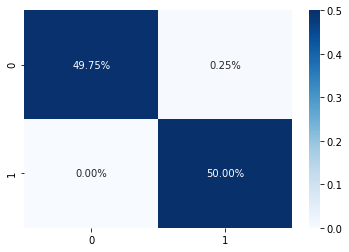

In [34]:
#build confusion matrix in percentage, the sum of diagonal elements will be the accuracy
sns.heatmap(cf_mat/np.sum(cf_mat), annot=True, 
            fmt='.2%', cmap='Blues')
cf_per = cf_mat/np.sum(cf_mat)
print('accuracy is ', np.trace(cf_per))

In [35]:
x_train = np.vstack((train_X_data[np.where(train_Y_data == target)][:800].reshape(-1, 784) for target in [0, 1, 2]))
y_train = np.concatenate([train_Y_data[np.where(train_Y_data == target)][:800] for target in [0, 1, 2]])

x_validation = np.vstack((train_X_data[np.where(train_Y_data == target)][800:1000].reshape(-1, 784) for target in [0, 1, 2]))
y_validation = np.concatenate([train_Y_data[np.where(train_Y_data == target)][800:1000] for target in [0, 1, 2]])

y_encode_train = one_hot(y_train, 3)
y_encode_validation = one_hot(y_validation, 3)

In [36]:
# Normalize inputs, notice mean and std are vectors
#self.Xmean, self.Xstd = np.tile(X.mean(0),(X.shape[0],1)), np.tile(X.std(0),(X.shape[0],1))
jitter = 1e-8
Xmean, Xstd = np.tile(x_train.mean(0),(x_train.shape[0],1)), np.tile(x_train.std(0),(x_train.shape[0],1))
X = (x_train - Xmean)/(Xstd + jitter*np.ones(Xstd.shape))
#use one hot encoding as output label
y = y_encode_train
#y = np.asarray(y).reshape(-1)
# Initiatlize parameters of the mean-field variational family
num_params = X.shape[1]
w = np.zeros((num_params,3))  
params = w
# Logger to monitor the loss function
loss_log = []
itercount = itertools.count()

In [37]:
# Define a function to calculate the log likelihood
def loss_multi(params, X, y):
    w = params.reshape((num_params, 3))
    # Compute log_likelihood
    logit_prob = np.matmul(X, w)
    prob_numerator = np.exp(logit_prob)
    prob_denominator =  np.sum(prob_numerator,axis=1)
    loss = np.sum(y*logit_prob) - np.sum(np.log(prob_denominator))
    return -loss

14.894531


Text(0, 0.5, 'loss')

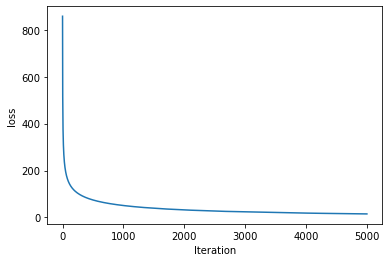

In [38]:
grad_loss_multi = grad(loss_multi)
lr = 0.00002

for i in range(5000):
    g = grad_loss_multi(params, X, y)
    params = params - lr*g
    #self.params = tree_multimap(lambda x, g: x - lr*g, self.params, g)
    loss_value = loss_multi(params, X, y)
    loss_log.append(loss_value)
    #pbar.set_postfix({'Loss': loss_value})
print(loss_value)
plt.figure()
plt.plot(loss_log)
plt.xlabel('Iteration')
plt.ylabel('loss')

In [39]:
# validation: compute probability for testing data with the trained model
w_final = params.reshape((num_params, 3))

# Normalize testing data inputs 
jitter = 1e-8
Xmean, Xstd = np.tile(x_validation.mean(0),(x_validation.shape[0],1)), np.tile(x_validation.std(0),(x_validation.shape[0],1))
X = (x_validation - Xmean)/(Xstd + jitter*np.ones(Xstd.shape))
#X = x_train
y = y_validation

# Compute probability for testing data
logit_prob = np.matmul(X, w_final)
prob_numerator = np.exp(logit_prob)
prob_denominator =  np.sum(prob_numerator,axis=1)
probability = prob_numerator.transpose()/prob_denominator
#print(probability.transpose())


In [40]:
# Generate label outputs (0,1,2) from the probability matrix : choose the label with largest probability 
prob_mat = probability.transpose()
lim = prob_mat.shape[0]

y_predict = np.argmax(prob_mat, axis=1)
y_true = np.asarray(y_validation).reshape(-1)

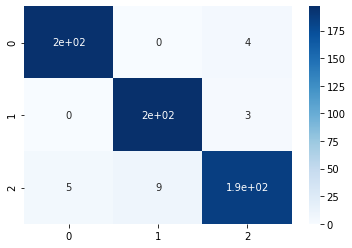

In [41]:
#build confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_mat = confusion_matrix(y_true, y_predict)
sns.heatmap(cf_mat, annot=True,cmap='Blues')

accuracy is  0.9649999


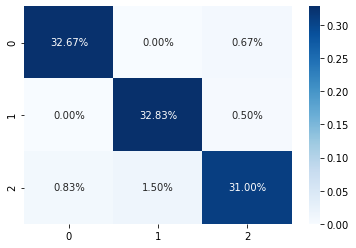

In [42]:
#build confusion matrix in percentage, the sum of diagonal elements will be the accuracy
sns.heatmap(cf_mat/np.sum(cf_mat), annot=True, 
            fmt='.2%', cmap='Blues')
cf_per = cf_mat/np.sum(cf_mat)
print('accuracy is ', np.trace(cf_per))